## Autocorrelation function

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datafile = "3HB_monomer_array_results/3HB_monomer_3_3_array_1_atm_data.txt"
df = pd.read_csv(datafile, delimiter='\t')

In [21]:
df.head(3)

,"#""Progress (%)""",Step,Time (ps),Potential Energy (kJ/mole),Kinetic Energy (kJ/mole),Total Energy (kJ/mole),Temperature (K),Box Volume (nm^3),Density (g/mL),Speed (ns/day),Elapsed Time (s)
0,0.1%,1000,2.0,-103787.307790,19735.006161,-84052.301629,327.209218,88.812507,0.813489,0.00,0.000750
1,0.2%,2000,4.0,-107581.040044,18650.821175,-88930.218869,309.233276,81.218066,0.889555,6.53,26.478185
2,0.3%,3000,6.0,-110142.254393,18471.624832,-91670.629561,306.262175,77.427698,0.933102,6.40,54.042044


In [28]:
density_data = df["Density (g/mL)"].tolist()
pot_en_data = df["Potential Energy (kJ/mole)"].tolist()

In [33]:
mean = np.mean(pot_en_data)
mean

-111925.48041089294

In [34]:
N = len(pot_en_data)
N

1000

In [36]:
autocovariance = np.correlate(pot_en_data - mean, pot_en_data - mean, mode='full')[-N:]
autocovariance

array([ 1.99923969e+08,  7.77401504e+07,  3.49333128e+07,  8.84319737e+06,
        4.68923642e+06,  4.47499915e+06, -6.48628704e+06, -6.32628286e+06,
       -1.70880267e+06, -7.20580956e+06,  6.46385902e+06,  8.55623236e+06,
        8.49381601e+06,  7.63851039e+06,  8.45114870e+06,  9.98149643e+06,
        7.54967611e+06, -2.35676319e+06, -3.85627083e+06, -1.16747156e+06,
        5.19982905e+06,  2.89779739e+06, -6.41887884e+05, -2.15199369e+06,
       -4.34901966e+06,  3.03619655e+06, -1.26177489e+06, -2.86368011e+06,
       -9.09840284e+06, -6.51732507e+06, -3.31072296e+06,  6.68242581e+05,
       -1.94778058e+06, -8.78411927e+06, -7.43832539e+06, -4.17425968e+06,
        3.84685490e+06,  5.88927869e+06,  9.11277456e+05,  9.60893282e+05,
       -4.71845260e+05, -1.33740901e+06, -6.96048566e+05,  1.10460687e+06,
       -7.51412243e+06, -2.64716687e+06, -7.16036252e+05,  1.00636867e+06,
       -4.94070631e+05, -3.02132545e+06,  1.91009884e+06,  5.50874908e+06,
        3.57575914e+06,  

In [38]:
autorrelation = autocovariance / (np.var(data)*N)
autorrelation

array([ 2.24642752e+06,  8.73520142e+05,  3.92524999e+05,  9.93657844e+04,
        5.26901793e+04,  5.02829218e+04, -7.28825755e+04, -7.10847031e+04,
       -1.92008061e+04, -8.09674250e+04,  7.26305651e+04,  9.61413282e+04,
        9.54399926e+04,  8.58294285e+04,  9.49605652e+04,  1.12156178e+05,
        8.48312502e+04, -2.64815557e+04, -4.33306372e+04, -1.31181883e+04,
        5.84274071e+04,  3.25608373e+04, -7.21251494e+03, -2.41806817e+04,
       -4.88673646e+04,  3.41159469e+04, -1.41778190e+04, -3.21774816e+04,
       -1.02233378e+05, -7.32313315e+04, -3.72006380e+04,  7.50864710e+03,
       -2.18860597e+04, -9.87019588e+04, -8.35800680e+04, -4.69036900e+04,
        4.32248359e+04,  6.61743454e+04,  1.02394864e+04,  1.07969901e+04,
       -5.30184643e+03, -1.50276749e+04, -7.82108653e+03,  1.24118149e+04,
       -8.44317545e+04, -2.97446502e+04, -8.04567634e+03,  1.13079702e+04,
       -5.55157980e+03, -3.39488491e+04,  2.14626522e+04,  6.18985589e+04,
        4.01786929e+04,  

In [43]:
lags = np.arange(0, len(autorrelation))

C:\Users\danie\AppData\Local\Temp\ipykernel_16356\1161995993.py:1: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, autorrelation, basefmt='k-', use_line_collection=True)


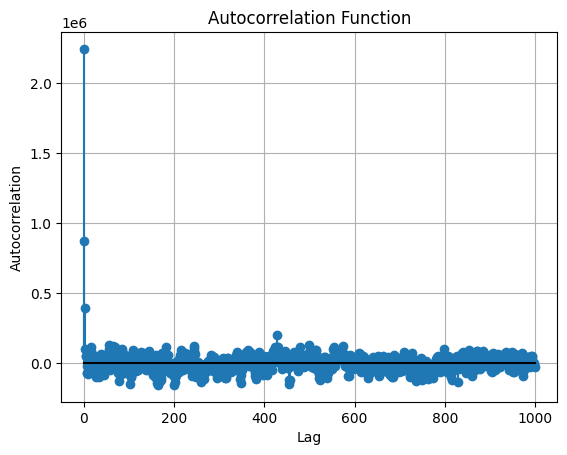

In [41]:
plt.stem(lags, autorrelation, basefmt='k-', use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.grid(True)
plt.show()

In [60]:
# Autocorr function
def autocorrelation(data):
    mean = np.mean(data)
    N = len(data)
    
    # Calculate autocovariance
    autocovariance = np.correlate(data - mean, data - mean, mode='full')[-N:]
    
    # Calculate autocorrelation
    autocorrelation = autocovariance / (np.var(data) * N)
    
    return autocorrelation

C:\Users\danie\AppData\Local\Temp\ipykernel_16356\1115832351.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, autocorrelated, basefmt='k-', use_line_collection=True)


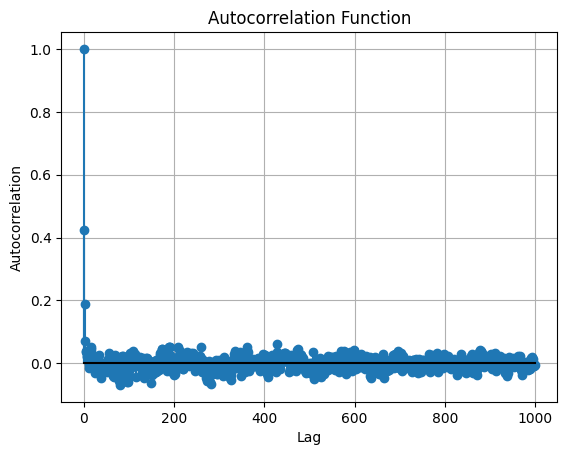

In [61]:
autocorrelated = autocorrelation(density_data)
lags = np.arange(0, len(autorrelation))

plt.stem(lags, autocorrelated, basefmt='k-', use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.grid(True)
plt.show()

In [45]:
df.head(3)

,"#""Progress (%)""",Step,Time (ps),Potential Energy (kJ/mole),Kinetic Energy (kJ/mole),Total Energy (kJ/mole),Temperature (K),Box Volume (nm^3),Density (g/mL),Speed (ns/day),Elapsed Time (s)
0,0.1%,1000,2.0,-103787.307790,19735.006161,-84052.301629,327.209218,88.812507,0.813489,0.00,0.000750
1,0.2%,2000,4.0,-107581.040044,18650.821175,-88930.218869,309.233276,81.218066,0.889555,6.53,26.478185
2,0.3%,3000,6.0,-110142.254393,18471.624832,-91670.629561,306.262175,77.427698,0.933102,6.40,54.042044


In [65]:
density_data = df["Density (g/mL)"].tolist()
pot_en_data = df["Potential Energy (kJ/mole)"].tolist()
step_data = df["Step"].tolist()
time_data = df["Elapsed Time (s)"].tolist()

In [84]:

data = (np.arange(0, 1000001, 10000)).tolist()
data2 = data + data + data + data + data

C:\Users\danie\AppData\Local\Temp\ipykernel_16356\3596617560.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, autocorrelated, basefmt='k-', use_line_collection=True)


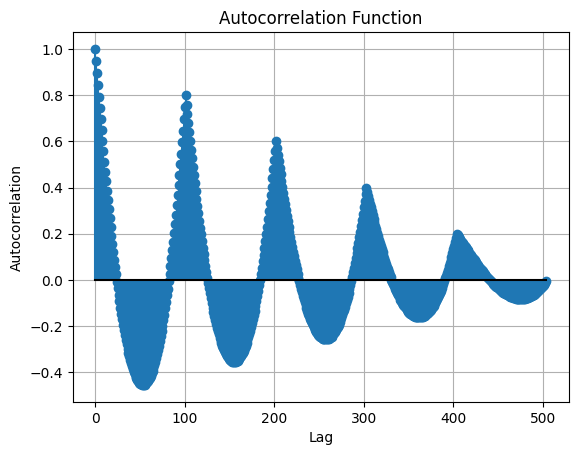

In [87]:
autocorrelated = autocorrelation(data2)
lags = np.arange(0, len(autocorrelated))

plt.stem(lags, autocorrelated, basefmt='k-', use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.grid(True)
plt.show()